1. Aplicaciones y reseñas de Google Play Store
Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativos. Debido a estos dos factores, cada vez se desarrollan más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android al comparar más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información en los datos para diseñar estrategias que impulsen el crecimiento y la retención.

## 1. Aplicaciones y reseñas de Google Play Store
<p>Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativos. Debido a estos dos factores, cada vez se desarrollan más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android al comparar más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos información en los datos para diseñar estrategias que impulsen el crecimiento y la retención..</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Echemos un vistazo a los datos, que consisten en dos archivos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 reseñas para cada aplicación, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">la más útil primero.</a> El texto de cada revisión ha sido preprocesado y se le atribuyen tres nuevas características: Sentimiento (Positivo, Negativo o Neutro), Sentimiento Polaridad y Sentimiento Subjetividad.</li>
</ul>

In [1]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
# Read in dataset
import pandas as pd
apps_with_duplicates = pd.read_csv('apps.csv',index_col=0)

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6487,På sporet ABC (BM),FAMILY,NaN,2,28.0,"1,000+",Free,0,Everyone,Educational,"December 21, 2016",v1.2,4.0 and up
7519,cPro Marketplace: Buy. Sell. Rent. Date. Jobs.,SHOPPING,4.4,385764,8.4,"10,000,000+",Free,0,Mature 17+,Shopping,"August 5, 2018",3.82,4.1 and up
2658,Shopee: No.1 Online Shopping,SHOPPING,4.2,608753,30.0,"10,000,000+",Free,0,Everyone,Shopping,"July 23, 2018",2.25.17,4.1 and up
6777,SW-100.tch by Callstel,COMMUNICATION,4.0,1926,0.7,"1,000,000+",Free,0,Everyone,Communication,"December 16, 2015",1.3.20,2.2 and up
3786,Haystack TV: Local & World News - Free,NEWS_AND_MAGAZINES,4.3,3684,NaN,"100,000+",Free,0,Everyone 10+,News & Magazines,"August 2, 2018",Varies with device,Varies with device


## 2. Limpieza de datos
<p>La limpieza de datos es una de las subtareas más esenciales de cualquier proyecto de ciencia de datos. Aunque puede ser un proceso muy tedioso, nunca se debe socavar su valor.</p>
<p>Al observar una muestra aleatoria de las filas del conjunto de datos (de la tarea anterior), observamos que algunas entradas en las columnas como <code>Installs</code> y <code>Price</code> tienen algunos caracteres especiales (<code>+</code> <code>,</code> <code>\$</code>) debido a la forma en que se han representado los números. Esto evita que las columnas sean puramente numéricas, lo que dificulta su uso en futuros cálculos matemáticos posteriores. Idealmente, como sugieren sus nombres, nos gustaría que estas columnas contuvieran solo dígitos del [0 al 9].</p>
<p>Por lo tanto, ahora procedemos a limpiar nuestros datos. Específicamente, los caracteres especiales <code>,</code> y <code>+</code> presentes en la columna <code>Installs</code> y <code>$</code> presente en la columna <code>Price</code> necesitan ser removidos.</p>
<p>También es siempre una buena práctica imprimir un resumen de su marco de datos después de completar la limpieza de datos. Usaremos el método <code>info()</code> para lograr esto.</p>

In [3]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ''))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB
None


## 3. Corrección de tipos de datos
<p>De la tarea anterior notamos que <code>Installs</code> y <code>Price</code> se categorizaron como tipo de datoss <code>object</code> data type (y no <code>int</code> o <code>float</code>) como nos gustaría. Esto se debe a que estas dos columnas originalmente tenían tipos de entrada mixtos: dígitos y caracteres especiales.</p>
<p>Las cuatro funciones con las que trabajaremos con mayor frecuencia de ahora en adelante son<code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. Mientras que <code>Size</code> y <code>Rating</code> son ambas <code>float</code> (es decir, tipos de datos puramente numéricos),  todavía tenemos que trabajar en<code>Installs</code> y <code>Price</code> para que sean numéricos..</p>

In [4]:
import numpy as np

# Convert Installs to float data type
apps['Installs'] = apps['Installs'].astype(float)

# Convert Price to float data type
apps['Price'] = apps['Price'].astype(float)

# Checking dtypes of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   float64
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB
None


## 4. Explorar categorías de aplicaciones
<p>Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para crear una audiencia global. Para que las empresas puedan mostrar sus aplicaciones a los usuarios, es importante que sean más rápidas y fáciles de encontrar en Google Play. Para mejorar la experiencia de búsqueda general, Google ha introducido el concepto de agrupar aplicaciones en categorías.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¿Qué categoría tiene la mayor proporción de aplicaciones (activas) en el mercado? </li>
<li>¿Hay alguna categoría específica que domine el mercado?</li>
<li>¿Qué categorías tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Veremos que hay <code>33</code> categorías de aplicaciones únicas presentes en nuestro conjunto de datos. Las aplicaciones <em>Familia</em> y <em>Juego</em> tienen la mayor prevalencia en el mercado. Curiosamente, las aplicaciones <em>Tools</em>, <em>Business</em> y <em>Medical</em> también se encuentran en la parte superior.</p>

In [53]:
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.express as px

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = px.bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
        labels = {'x':'Category', 'y':'Number of apps'}
)

data.show()

Number of categories =  33


## 5. Distribución de calificaciones de aplicaciones
<p>Después de haber visto la cuota de mercado de cada categoría de aplicaciones, veamos el rendimiento medio de todas estas aplicaciones. Las calificaciones de las aplicaciones (en una escala del 1 al 5) afectan la capacidad de descubrimiento, la conversión de las aplicaciones y la imagen de marca general de la empresa. Las valoraciones son un indicador clave del rendimiento de una aplicación.</p>
<p>A partir de nuestra investigación, descubrimos que el volumen promedio de calificaciones en todas las categorías de aplicaciones es <code>4.17</code>. El gráfico del histograma está sesgado hacia la izquierda, lo que indica que la mayoría de las aplicaciones tienen calificaciones altas, con solo unas pocas excepciones en las aplicaciones con calificaciones bajas.</p>

In [56]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = px.histogram(x = apps['Rating'],labels={'x':'Rating'})

data.add_shape(type="line", x0=avg_app_rating, y0=0, x1=avg_app_rating, y1=1000, line= {'dash': 'dashdot'})
data.show()

Average app rating =  4.173243045387994


## 6. Tamaño y precio de una aplicación
<p>Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede ser difícil o costosa para los usuarios descargarla. Los tiempos prolongados de descarga pueden desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad finita de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o económicas. Estos problemas se agravan si el mundo en desarrollo es parte de su mercado objetivo; especialmente debido a las velocidades de Internet, el poder adquisitivo y los tipos de cambio.</p>
<p>¿Cómo podemos idear estrategias efectivas para dimensionar y fijar el precio de nuestra aplicación?</p>
<ul>
<li>¿El tamaño de una aplicación afecta su clasificación? </li>
<li>¿A los usuarios realmente les importan las aplicaciones que requieren mucho sistema o prefieren las aplicaciones livianas? </li>
<li>¿El precio de una aplicación afecta su calificación? </li>
<li>¿Los usuarios siempre prefieren las aplicaciones gratuitas a las de pago?</li>
</ul>
<p>Descubrimos que la mayoría de las aplicaciones mejor calificadas (calificación superior a 4) varían entre 2 MB y 20 MB. También encontramos que la gran mayoría de las aplicaciones tienen un precio inferior a \$10.</p>

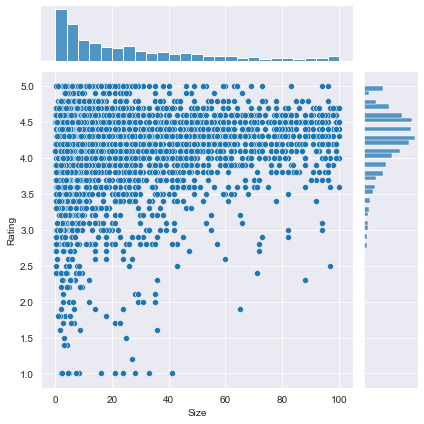

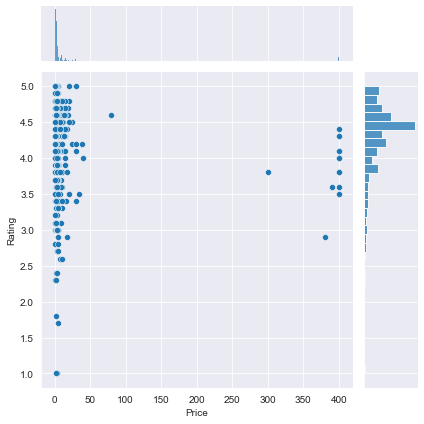

In [7]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relación entre la categoría de la aplicación y el precio de la aplicación
<p>Así que ahora viene la parte difícil. ¿Cómo se supone que las empresas y los desarrolladores lleguen a fin de mes? ¿Qué estrategias de monetización pueden usar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las funciones, la complejidad y la plataforma.</p>
<p>Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante considerar la disposición de su cliente a pagar por su aplicación. Un precio incorrecto podría romper el trato antes de que ocurra la descarga. Los clientes potenciales podrían desanimarse por lo que perciben como un costo impactante, o podrían eliminar una aplicación que descargaron después de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.</p>
<p>Diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicación de calculadora, probablemente deberían mantenerse gratuitas. Sin embargo, tendría sentido cobrar por una aplicación médica altamente especializada que diagnostica a pacientes diabéticos. A continuación, vemos que las aplicaciones <em>Medical and Family</em> son las más caras. ¡Algunas aplicaciones médicas se extienden hasta \$80! Todas las aplicaciones de juegos tienen un precio razonable por debajo de \$20.</p>

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


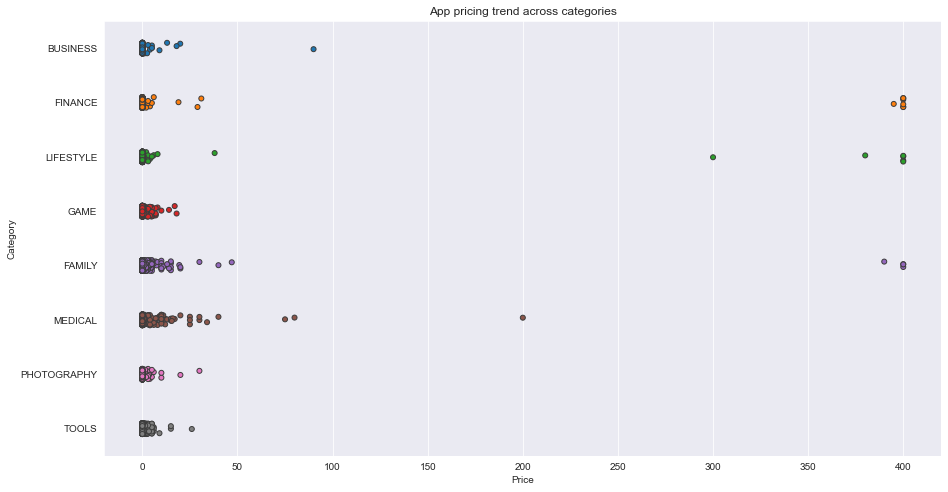

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats['Price']> 200]
apps_above_200[['Category', 'App', 'Price']]

## 8. Filtra las aplicaciones "basura"
<p>Parece que muchas de las aplicaciones realmente caras son aplicaciones "basura". Es decir, aplicaciones que en realidad no tienen un propósito. Algunos desarrolladores de aplicaciones pueden crear una aplicación llamada <em>I Am Rich Premium</em> o <em>la aplicación más cara (H)</em> solo como broma o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intenciones maliciosas e intentan ganar dinero con la esperanza de que las personas hagan clic accidentalmente en comprar en su aplicación en la tienda.</p>
<p>Filtremos estas aplicaciones basura y volvamos a hacer nuestra visualización.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

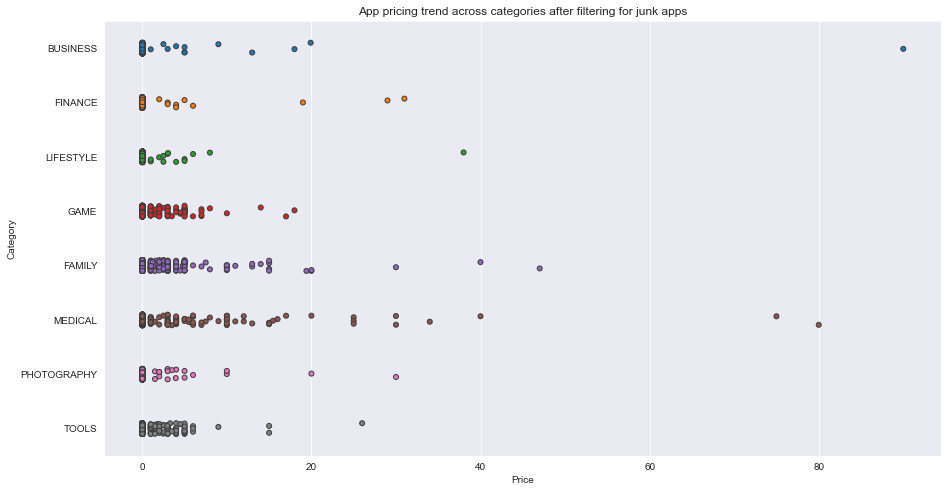

In [9]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularidad de las aplicaciones pagas frente a las aplicaciones gratuitas
<p>Para las aplicaciones en Play Store centrémonos solo en las aplicaciones gratuitas y de pago. Algunas características de las aplicaciones gratuitas son:</p>
<ul>
<li>Descarga gratuita.</li>
<li>La principal fuente de ingresos a menudo proviene de los anuncios.</li>
<li>Suele ser creada por empresas que tienen otros productos y la aplicación sirve como una extensión de esos productos.</li>
<li>Puede servir como una herramienta para la retención de clientes, la comunicación y el servicio al cliente.</li>
</ul>
<p>Algunas características de las aplicaciones de pago son:</p>
<ul>
<li>Se pide a los usuarios que paguen una vez para descargar y usar la aplicación.</li>
<li>El usuario realmente no puede tener una idea de la aplicación antes de comprarla.</li>
</ul>
<p>¿Se instalan tanto las aplicaciones de pago como las gratuitas? Resulta que las aplicaciones pagas tienen un número relativamente menor de instalaciones que las aplicaciones gratuitas, ¡aunque la diferencia no es tan marcada como hubiera esperado!</p>

In [37]:
fig = px.box(apps, y = 'Installs', x='Type', log_y=True, color= apps['Type'], title = "Number of downloads of paid apps vs. free apps",
            labels= {'Type': '', 'Installs':'Log number of downloads'}, category_orders = {'Type': ['Paid', 'Free']})
fig.show()

## 10. Análisis de opinión de las opiniones de los usuarios
<p>La extracción de datos de reseñas de usuarios para determinar cómo se sienten las personas con respecto a su producto, marca o servicio se puede realizar mediante una técnica denominada análisis de sentimientos. Las opiniones de los usuarios sobre las aplicaciones se pueden analizar para identificar si el estado de ánimo es positivo, negativo o neutral sobre esa aplicación. Por ejemplo, las palabras positivas en una revisión de una aplicación pueden incluir palabras como "increíble", "amable", "bueno", "excelente" y "me encanta". Las palabras negativas pueden ser palabras como "malware", "odio", "problema", "reembolso" e "incompetente".</p>
<p>Al graficar los puntajes de polaridad de sentimiento de las reseñas de usuarios para aplicaciones pagadas y gratuitas, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como lo indican los valores atípicos en el eje y negativo. Las reseñas de aplicaciones pagas nunca parecen ser extremadamente negativas. Esto puede indicar algo sobre la calidad de la aplicación, es decir, las aplicaciones pagas son de mayor calidad que las aplicaciones gratuitas en promedio. El puntaje de polaridad promedio para las aplicaciones pagas es un poco más alto que el de las aplicaciones gratuitas, lo que se sincroniza con nuestra observación anterior.</p>
<p>En este cuaderno, analizamos más de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para informar nuestras decisiones si alguna vez deseamos crear una aplicación nosotros mismos.</p>

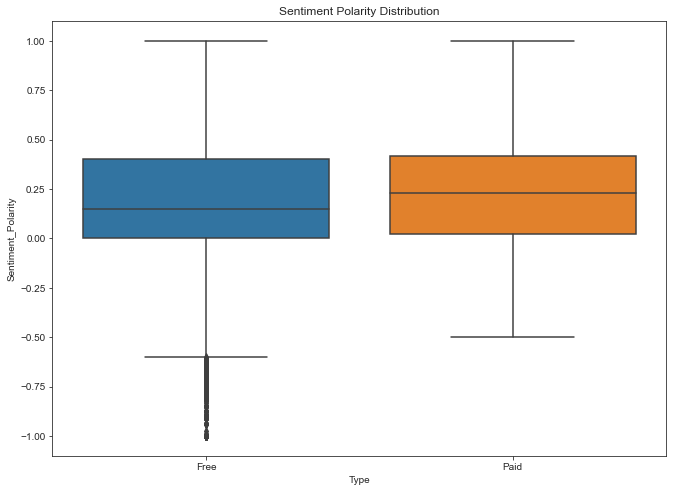

In [59]:
# Load user_reviews.csv
reviews_df = pd.read_csv('user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on='App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution');